### **Célula de inicialização dos imports**

In [40]:
# Inicialização dos imports e caminho do pacote
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from nao_supervisionado.loading_images import loading_images
from nao_supervisionado.normalize import normalize
from nao_supervisionado.tsne_runner import tsne_runner
from nao_supervisionado.pca_runner import pca_runner
from nao_supervisionado.umap_runner import umap_runner
from nao_supervisionado.cluster_runner import cluster_runner

### **Célula para carregar e normalizar os dados**

In [36]:
# Carregar imagens do dataset
print("Carregando imagens...")
X, files, labels = loading_images("../data/RecFac", image_size=(128, 120))
print(f"Total de imagens carregadas: {len(files)}")

# Normalizar os dados
print("Normalizando dados...")
X_norm = normalize(X)


Carregando imagens...
Total de imagens carregadas: 640
Normalizando dados...


In [41]:
# Executar t-SNE
print("Executando t-SNE...")
X_tsne = tsne_runner(X_norm, perplexity=30)

Executando t-SNE...
t-SNE salvo em: /home/pedro/projetos/ML-Project/notebooks/plots/tsne/tsne_perplexity_30.png


Executando t-SNE...
t-SNE salvo em: /home/pedro/projetos/ML-Project/notebooks/plots/tsne/tsne_perplexity_30.png
Executando PCA...
PCA 90% salvo em: /home/pedro/projetos/ML-Project/notebooks/plots/pca/pca_90.png
PCA 80% salvo em: /home/pedro/projetos/ML-Project/notebooks/plots/pca/pca_80.png
PCA 75% salvo em: /home/pedro/projetos/ML-Project/notebooks/plots/pca/pca_75.png
Executando UMAP...


/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔹 Executando UMAP 3D...


/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


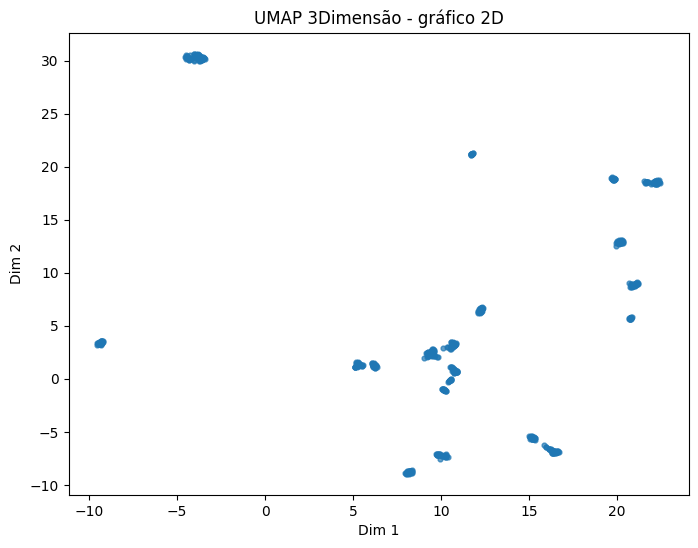

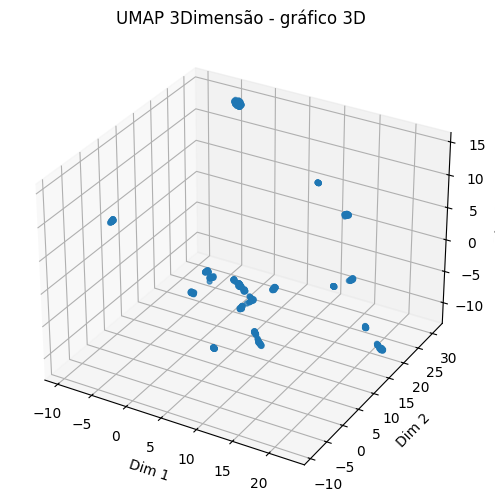

🔹 Executando UMAP 15D...


/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


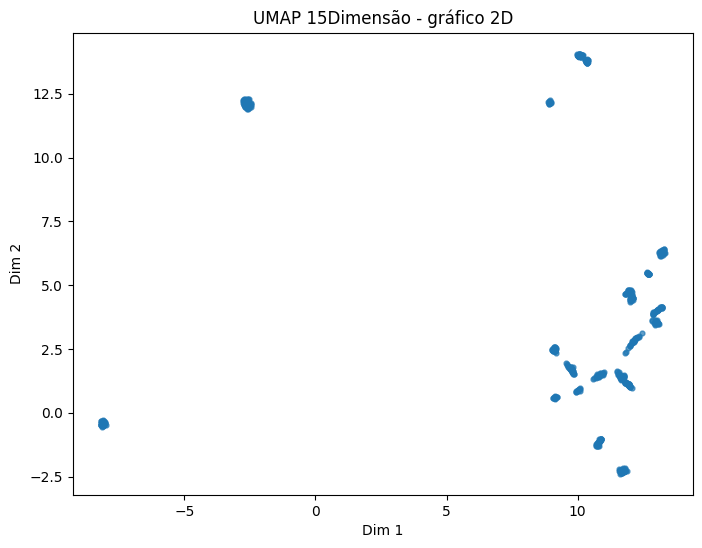

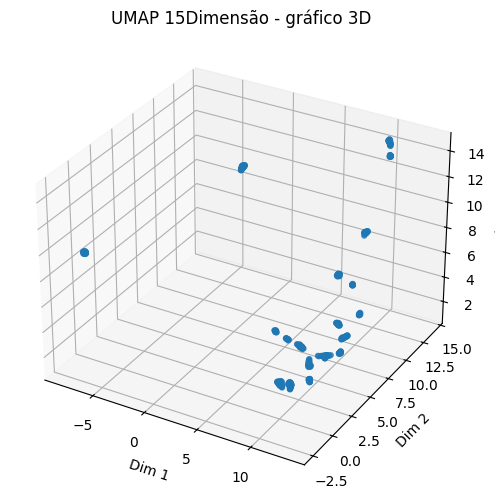

🔹 Executando UMAP 55D...


/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


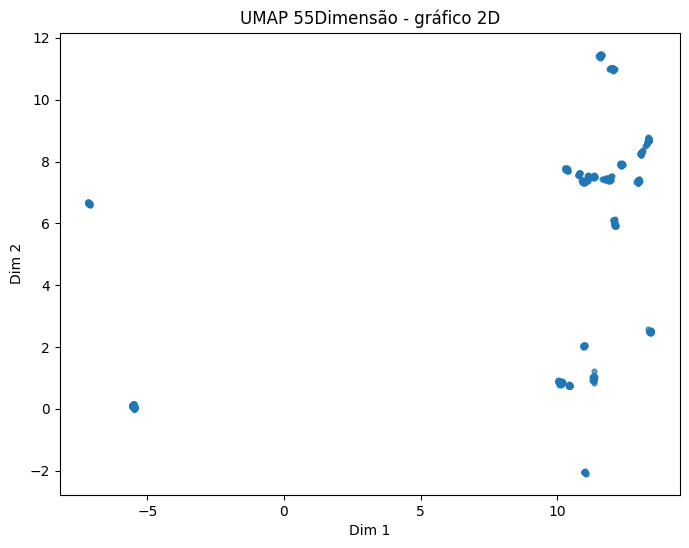

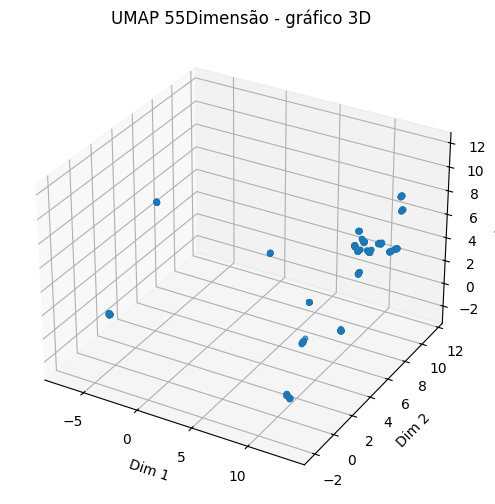

🔹 Executando UMAP 101D...


/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


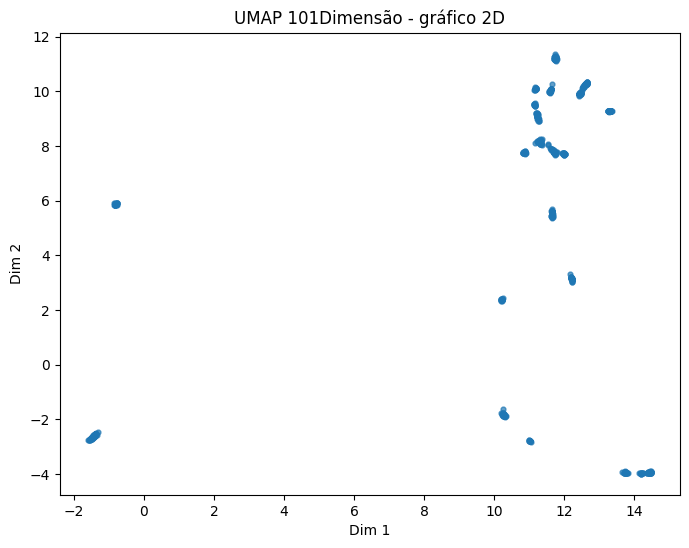

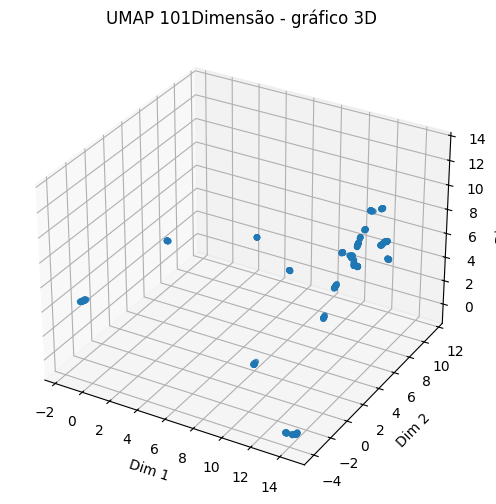

In [ ]:
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    # Diâmetro intracluster 
    intra_dists = []
    for lbl in unique_labels:
        points = X[labels == lbl]
        if len(points) > 1:
            intra_dists.append(np.max(pairwise_distances(points)))
        else:
            intra_dists.append(0)
    max_intra = np.max(intra_dists)
    
    # Distância intercluster 
    inter_dists = []
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            points_i = X[labels == unique_labels[i]]
            points_j = X[labels == unique_labels[j]]
            inter_dists.append(np.min(pairwise_distances(points_i, points_j)))
    min_inter = np.min(inter_dists)
    
    if max_intra == 0:
        return np.inf  
    return min_inter / max_intra

🔹 K-Means nos embeddings t-SNE:


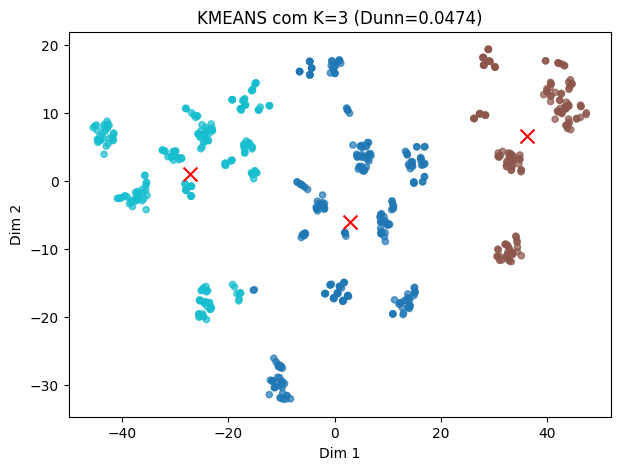

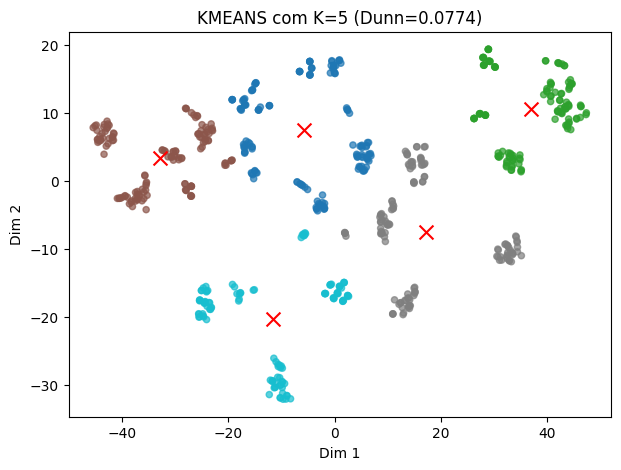

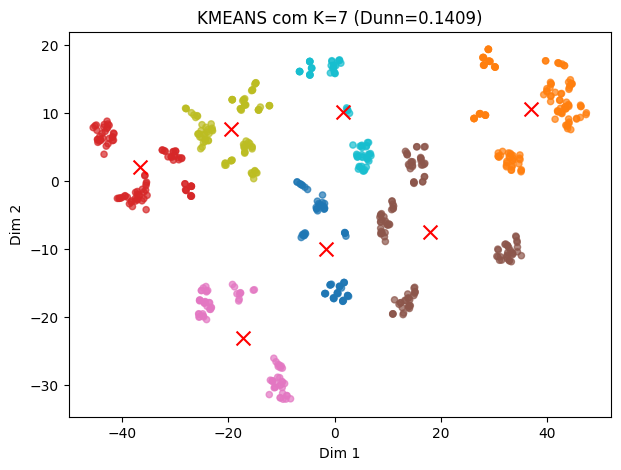

🔹 K-Medoids nos embeddings UMAP:


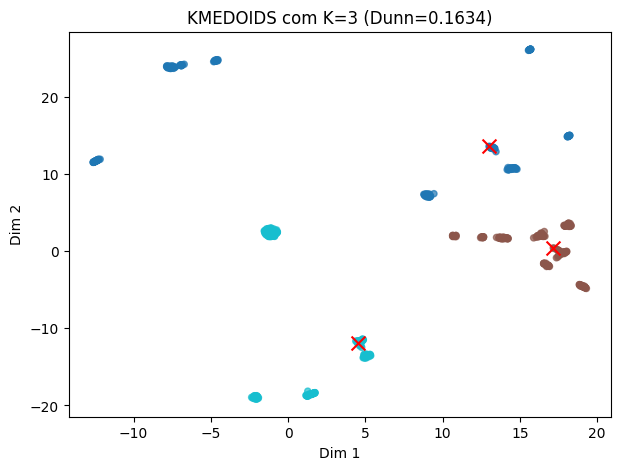

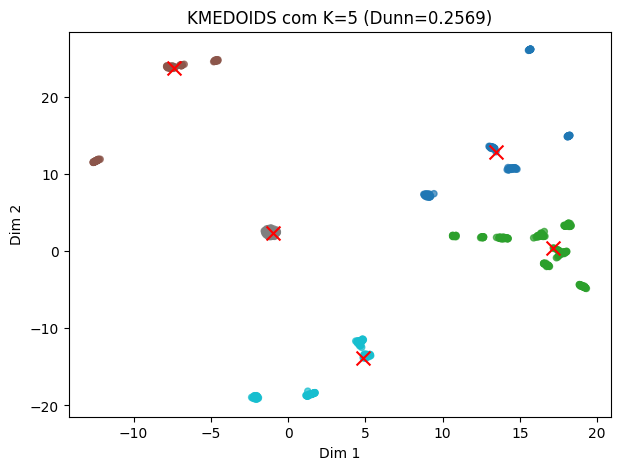

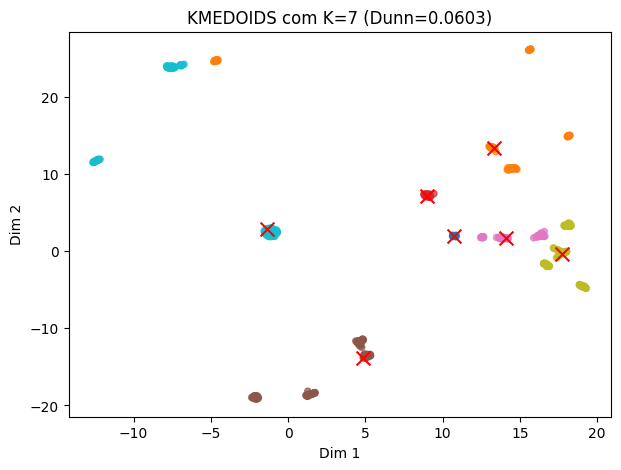

In [25]:
def cluster_runner( X: np.ndarray, k_values: list = [3, 5, 7], method: str = "kmeans") -> Dict[int, float]:
    
    results = {}
    
    for k in k_values:
        # Seleção do modelo
        if method.lower() == "kmeans":
            model = KMeans(n_clusters=k, random_state=42)
        elif method.lower() == "kmedoids":
            model = KMedoids(n_clusters=k, random_state=42)
        else:
            raise ValueError("Método deve ser 'kmeans' ou 'kmedoids'.")
        
        labels = model.fit_predict(X)
        dunn = dunn_index(X, labels)
        results[k] = dunn
        
        # Plot 2D
        if X.shape[1] == 2:
            plt.figure(figsize=(7,5))
            plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", alpha=0.7, s=20)
            plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red", marker="x", s=100)
            plt.title(f"{method.upper()} com K={k} (Dunn={dunn:.4f})")
            plt.xlabel("Dim 1")
            plt.ylabel("Dim 2")
            plt.show()
        
        # Plot 3D
        elif X.shape[1] >= 3:
            fig = plt.figure(figsize=(8,6))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:,0], X[:,1], X[:,2], c=labels, cmap="tab10", alpha=0.7, s=20)
            ax.set_title(f"{method.upper()} com K={k} (Dunn={dunn:.4f})")
            ax.set_xlabel("Dim 1")
            ax.set_ylabel("Dim 2")
            ax.set_zlabel("Dim 3")
            plt.show()
    
    return results


# Clusterizando t-SNE com K-Means
print("🔹 K-Means nos embeddings t-SNE:")
kmeans_results_tsne = cluster_runner(X_tsne, k_values=[3,5,7], method="kmeans")

# Clusterizando UMAP com K-Medoids
print("🔹 K-Medoids nos embeddings UMAP:")
kmedoids_results_umap = cluster_runner(X_umap, k_values=[3,5,7], method="kmedoids")